In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from train_model import build_model
from train_model import dice_bc_loss

Your pathes (need to be changed) and evaluating batch size

In [2]:
# path to model's weights
save_weights_path = '../data/checkpoint/model_dc01bc256/my_model'

# pathes to dataset for evaluation
# Be attentive, these must be pathes to 'img/' folders!!! 
img_folder_path = '../data/ship_dataset/test_img/'
mask_folder_path = '../data/ship_dataset/test_mask/'

# pathes to dataset for visual testing
test_path1 = '../data/test_photos/'

# The number of photos in the evaluating folder must be divisible by batch_size
batch_size = 256

# The '/' is need to be in the end of the path

Loading model (don't change anything)

In [3]:
# Performance measure, dice score on binary images
def dice_score(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.where(y_pred > 50/255.0, 1.0, 0.0)
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / denominator

In [4]:
img_shape = (768, 768, 3)

model = build_model(img_shape)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00025)
model.compile(optimizer=optimizer, loss=dice_bc_loss, metrics=[dice_score])
model.load_weights(save_weights_path).expect_partial()

In [5]:
seed = 909

image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
mask_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

image_generator = image_datagen.flow_from_directory(img_folder_path, batch_size=batch_size, 
                                                    class_mode=None, seed=seed)
mask_generator = mask_datagen.flow_from_directory(mask_folder_path, batch_size=batch_size, 
                                                    class_mode=None, seed=seed)

test_generator = zip(image_generator, mask_generator)

steps = int(len(os.listdir(img_folder_path + '/img')) / batch_size)

Found 512 images belonging to 1 classes.


Found 512 images belonging to 1 classes.


## Model performance

#### Dice Score on 512 images

In [6]:
results = model.evaluate(test_generator, steps=steps)
print('Dice score =', round(results[1], 3))

2/2 [==============================] - 18s 9s/step - loss: 0.3041 - dice_score: 0.7009
Dice score = 0.701


#### Visual results

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]

def show_img_and_result(test_path, img_i_name):
    img_i = cv2.imread(test_path + img_i_name)
    img_i = cv2.cvtColor(img_i, cv2.COLOR_BGR2RGB)
    img_i = img_i / 255.0
    mask = model.predict(np.array([img_i]))
    mask = np.where(mask > 50/255.0, 255, 0)
    mask = mask.astype('uint8')
    plt.subplot(1, 2, 1)
    plt.imshow(img_i)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(mask[0, :, :, 0], cmap='gray')
    plt.axis('off')

imgs_names = os.listdir(test_path1)

1/1 [==============================] - 1s 864ms/step


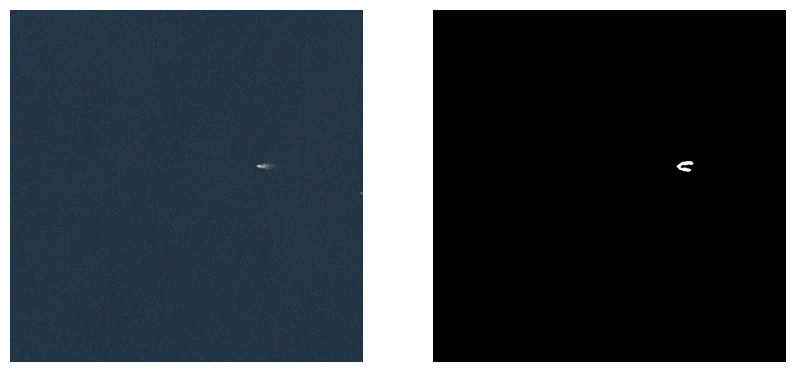

In [8]:
show_img_and_result(test_path1, imgs_names[0])

1/1 [==============================] - 0s 285ms/step


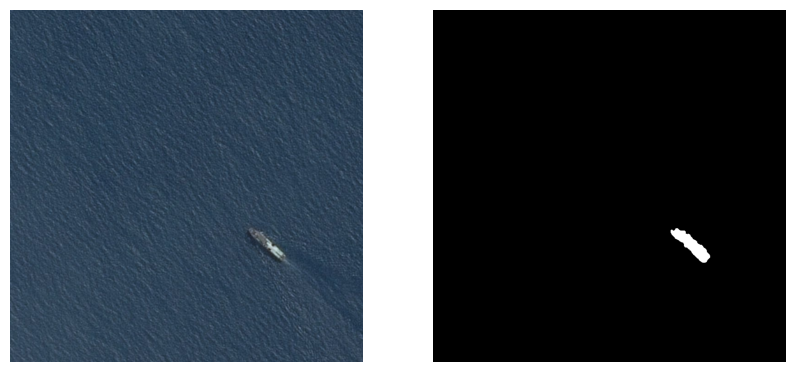

In [9]:
show_img_and_result(test_path1, imgs_names[1])

1/1 [==============================] - 0s 284ms/step


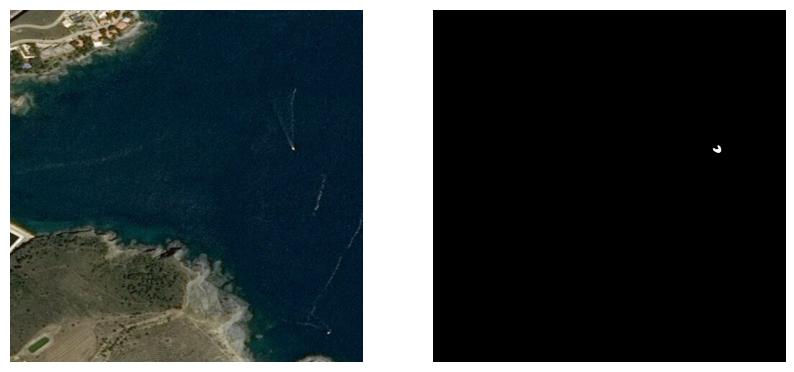

In [10]:
show_img_and_result(test_path1, imgs_names[3])

1/1 [==============================] - 0s 288ms/step


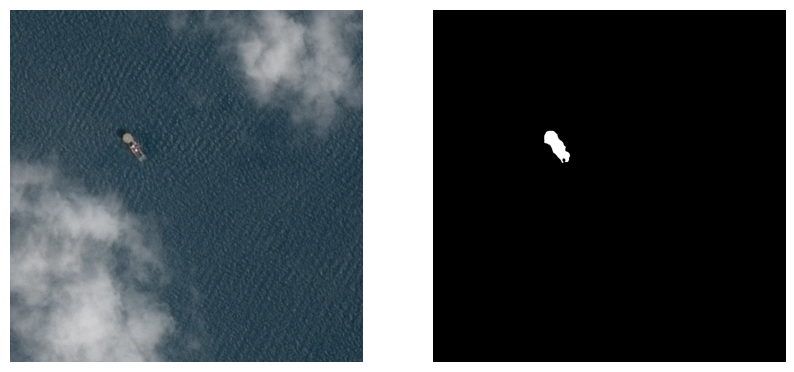

In [11]:
show_img_and_result(test_path1, imgs_names[4])

1/1 [==============================] - 0s 284ms/step


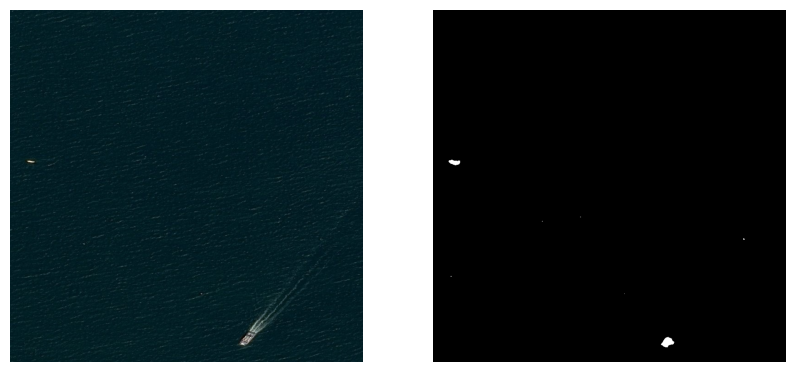

In [12]:
show_img_and_result(test_path1, imgs_names[5])

1/1 [==============================] - 0s 292ms/step


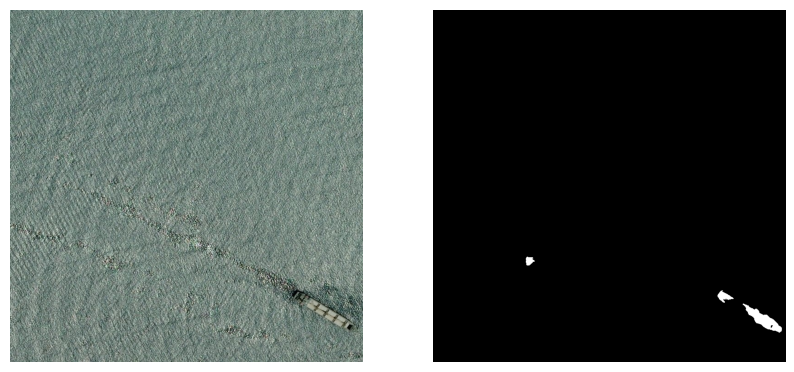

In [13]:
show_img_and_result(test_path1, imgs_names[2])